<a href="https://colab.research.google.com/github/89CANDY89/TRATAMENTO-DADOS-FARMACIA-IMERS-O-ALURA/blob/main/3D_IMERS%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 3 DIA IMERSÃO

## Importando dados

In [7]:
import pandas as pd
pd.set_option('display.max_columns', 15) #mostra apenas 15 colunas quando manda plotar tudo (esse dataset tem mais de 800)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use(style='seaborn-darkgrid')#('fivethirtyeight')
sns.set()

In [5]:
url_dados = 'https://github.com/LincolnVS/ImersaoDadosAlura/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,...,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,...,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,...,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,...,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [6]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,...,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [16]:
# Criando uma correlação entre duas variáveis do dataset.
pd.crosstab(dados['dose'], dados['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


Então analisando nossa tabela de frequência, temos os dados, onde dose e tempo tem uma correlação, mas não sabemos que tipo de tratamento foi utilizado.

In [17]:
# Adicionando a variável tratamento na tabela de frequência.
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

Agora conseguimos analisa a tabela através do tipo de tratamento.

In [18]:
# Normalizando tabela frequência
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Fazer este tipo de análise possibilita que façamos algumas suposições acerca do balanceamento entre as categorias e, analisando a nossa matriz, podemos concluir que há proporcionalidade na nossa base de dados.

In [20]:
# Adicionando uma métrica estatística a matriz
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values= dados['g-0'], aggfunc= 'mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

# Visualização de relaçoes entre genes

In [22]:
dados[['g-0', 'g-3']]

,g-0,g-3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


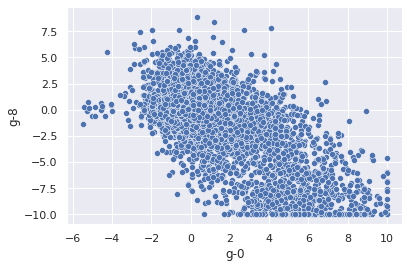

In [11]:
# Gráfico de comparação entre genes.
sns.scatterplot(x = 'g-0', y= 'g-8', data= dados)

Analisando o gráfico percebemos que não a uma padrão entre os genes.

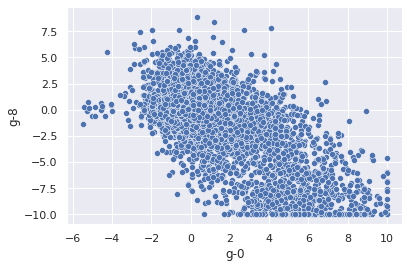

In [24]:
# Gráfico de comparação entre genes.
sns.scatterplot(x = 'g-0', y= 'g-8', data= dados)

Agora notamos que temos uma padrão nessa comparação, que enquanto **g0** aumenta o **g8** diminui.

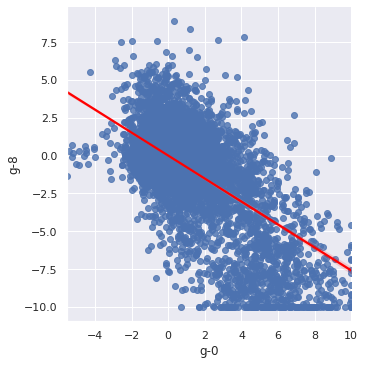

In [26]:
sns.lmplot(data= dados, x= 'g-0', y= 'g-8', line_kws= {'color' : 'red'})

**Visualização gráfica com separação de cojuntos **

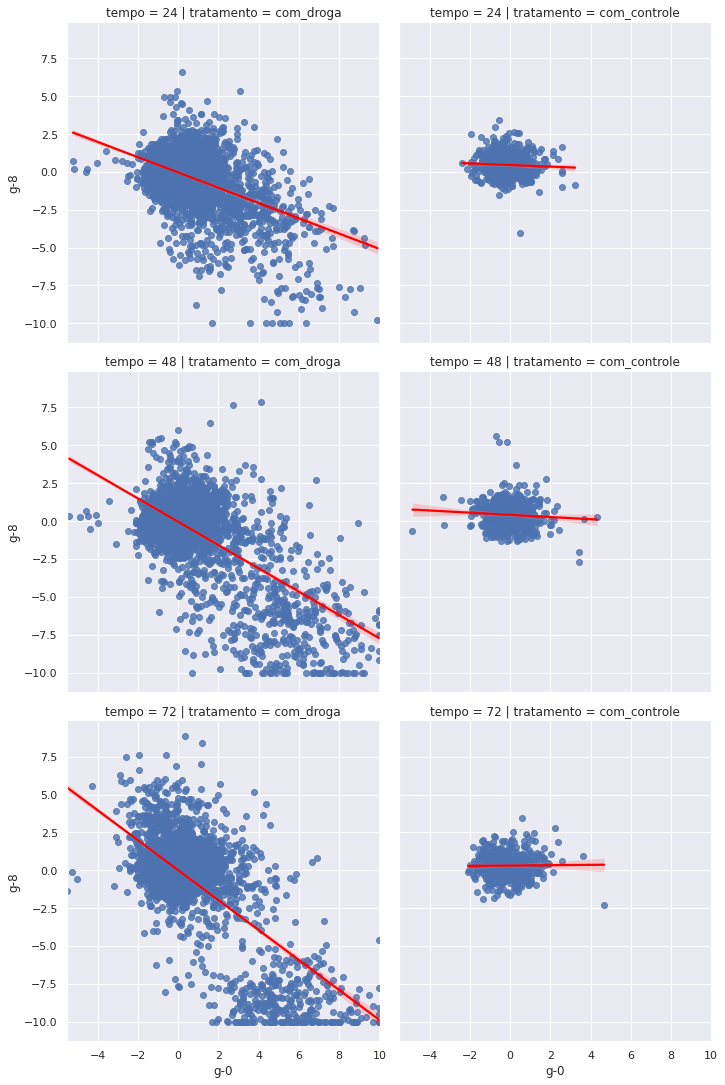

In [27]:
# Os conjuntos que serão analisados são "tratamento e tempo"
sns.lmplot(data= dados, x= 'g-0', y= 'g-8', line_kws= {'color' : 'red'}, col= 'tratamento', row='tempo')

# Calculando a Correlação de um conjunto de dados

In [29]:
dados.loc[: ,'g-0': 'g-10'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021
g-5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743
g-6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575
g-7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325
g-8,-0.604212,-0.009973,-0.128029,-0.086167,-0.474828,0.073885,-0.212292,0.278085,1.000000,0.330284,0.556854
g-9,-0.428779,-0.047558,-0.081332,-0.014052,-0.274167,0.126561,-0.134739,0.288780,0.330284,1.000000,0.423656


# Visualizando correlação  com gráfico heatmap

dos genes

In [31]:
corr = dados.loc[:,'g-0':'g-50'].corr()

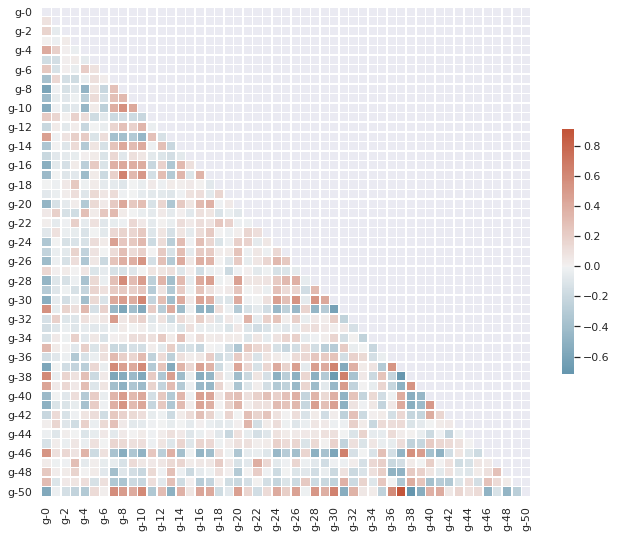

In [32]:
import numpy as np


# Gere uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Gerar um mapa de cores divergentes personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenhe o mapa de calor com a máscara e a proporção correta
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

das celulças

In [34]:
corr_celular = dados.loc[: , 'c-0': 'c-50'].corr()

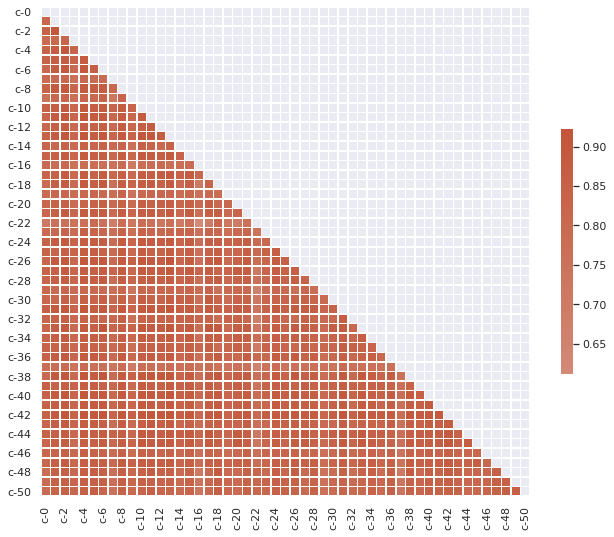

In [35]:
# Gere uma máscara para o triângulo superior
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Gerar um mapa de cores divergentes personalizado
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Desenhe o mapa de calor com a máscara e a proporção correta
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Desafios 

- *Desafio 01*: Criar tabelas de frequência com pandas.groupby()
- *Desafio 02*: Normalizar o crosstab pela coluna.
- *Desafio 03*: Explorar outros agregadores.
- *Desafio 04*: Explorar o melt.
- *Desafio 05*: Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos. 
- *Desafio 06*: Estudar o código que plota a matriz de correlação (heatmap)
- *Desafio 07*: Resumo do que você aprendeu com os dados

## Desafio 1

**Criar tabelas de frequência com pandas.groupby()**

In [ ]:
#Tabela de frequencia com crosstab
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
#Tabela de frequencia com groupby e unstack
dados.groupby(['tratamento','dose','tempo']).size().unstack(0)

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
#Tabela de frequencia com groupby e agg
dados.groupby(by=['dose','tempo']).agg(
    com_controle=("tratamento", lambda x: (x=='com_controle').sum()),
    com_droga=("tratamento", lambda x: (x=='com_droga').sum()),
    )

com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
#Tabela de frequencia usando pivot_table
dados.pivot_table(index=['dose', 'tempo'], columns='tratamento', aggfunc='size')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [ ]:
#Tabela de frequencia com groupby e value_counts
dados.groupby(by=['dose', 'tempo'])['tratamento'].value_counts()

dose  tempo  tratamento  
D1    24     com_droga       3585
             com_controle     301
      48     com_droga       4011
             com_controle     343
      72     com_droga       3600
             com_controle     307
D2    24     com_droga       3581
             com_controle     305
      48     com_droga       3591
             com_controle     305
      72     com_droga       3580
             com_controle     305
Name: tratamento, dtype: int64

## Desafio 2

**Normalizar o crosstab pela coluna.**

- ` normalize = 'index'` divides each cell by the sum of its row
- ` normalize = 'columns'`  divides each cell by the sum of its column
- ` normalize = True`  divides each cell by the total of all cells in the table

[referência](https://stackoverflow.com/a/57710608)

In [ ]:
#Tabela de frequencia com crosstab normalizado total
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize=True)

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.012640   0.150542
     48         0.014403   0.168430
     72         0.012892   0.151172
D2   24         0.012808   0.150374
     48         0.012808   0.150794
     72         0.012808   0.150332

In [ ]:
#Tabela de frequencia com crosstab normalizado por linha
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [ ]:
#Tabela de frequencia com crosstab normalizado por coluna
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

## Desafio 3

**Explorar outros agregadores.**

Pandas possui diversas formas de resumir os dados em valores (agregar). Algumas formas:

|         Função         |                        Descrição                        |
|:----------------------:|:-------------------------------------------------------:|
| count()                | Conta os itens (numero total)                           |
| first(), last()        | Primeiro / ultimo valor                                 |
| mean(), median()       | Média / mediana                                         |
| min(), max()           | minimo / maximo                                         |
| std(), var()           | Desvio padrão / variancia                               |
| mad()                  | Desvio absoluto<br>(Mean absolute deviation)            |
| prod()                 | Multiplicação de todos os valores                       |
| sum()                  | Soma de todos os valores                                |
| describe() [numéricos] | count, mean, std, min, max<br>e quartil (25%,50% e 75%) |
| describe() [objetos]   | count, unique, top, e freq.                             |
| describe() [outros]    | count e top                                             |

In [ ]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], values=dados['g-0'], aggfunc='first')

tratamento  com_controle  com_droga
dose tempo                         
D1   24          -0.1636     1.0620
     48          -0.6696     0.6280
     72          -0.6723     0.0743
D2   24          -1.3200     2.0440
     48           0.4860    -0.0630
     72           0.7344    -0.3254

In [ ]:
dados.groupby(by=['dose','tempo','tratamento'])[['g-0']].agg(['mean','min','max'])

g-0               
                             mean    min     max
dose tempo tratamento                           
D1   24    com_controle -0.251760 -2.370   3.226
           com_droga     0.367996 -5.183   9.908
     48    com_controle -0.122773 -3.276   3.423
           com_droga     0.412469 -5.420  10.000
     72    com_controle -0.295271 -2.086   2.584
           com_droga     0.286250 -5.261   9.355
D2   24    com_controle  0.010754 -2.135   2.601
           com_droga     0.115253 -5.233   7.167
     48    com_controle  0.013174 -4.859   4.335
           com_droga     0.214480 -4.567  10.000
     72    com_controle  0.070250 -1.909   4.670
           com_droga     0.253439 -5.513  10.000

## Desafio 4

**Explorar o melt.**

In [ ]:
#A função .melt constrói uma nova coluna com todos os valores. Além disso, muda o indixe da tabela.
dados.melt(id_vars=['tempo','dose', 'tratamento'], value_vars=['g-0', 'g-1'], var_name='variável', value_name='valor')

,tempo,dose,tratamento,variável,valor
0,24,D1,com_droga,g-0,1.0620
1,72,D1,com_droga,g-0,0.0743
2,48,D1,com_droga,g-0,0.6280
3,48,D1,com_droga,g-0,-0.5138
4,72,D2,com_droga,g-0,-0.3254
...,...,...,...,...,...
47623,24,D2,com_droga,g-1,-0.0636
47624,24,D2,com_droga,g-1,0.3478
47625,48,D2,com_controle,g-1,0.3756
47626,24,D1,com_droga,g-1,0.2324


## Desafio 5

**Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.**

Dica Vanessa no discord: 
    
- Podemos pensar que os genes que têm o mesmo comportamento em todos os tipos celulares, podem estar relacionados a funções vitais que toda célula precisa exercer. E agora é só tentar entender por que alguns genes são regulados de uma maneira em certos tipos celulares, mas em outros não?

[link de apoio](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5990023/)

**Respostas do lincoll:**
Considerando que ter o comportamento do gene de uma forma na célula, diferencia as funções da mesma. Comportamentos desses genes em células diferentes, pode indicar uma função específica, visto que esse comportamento muda conforme a célula que se encontra.  

In [ ]:
#Exemplo em codigo
corr = pd.concat([dados.loc[:,'g-0':'g-500'],dados.loc[:,'c-0':'c-99']],axis=1).corr()

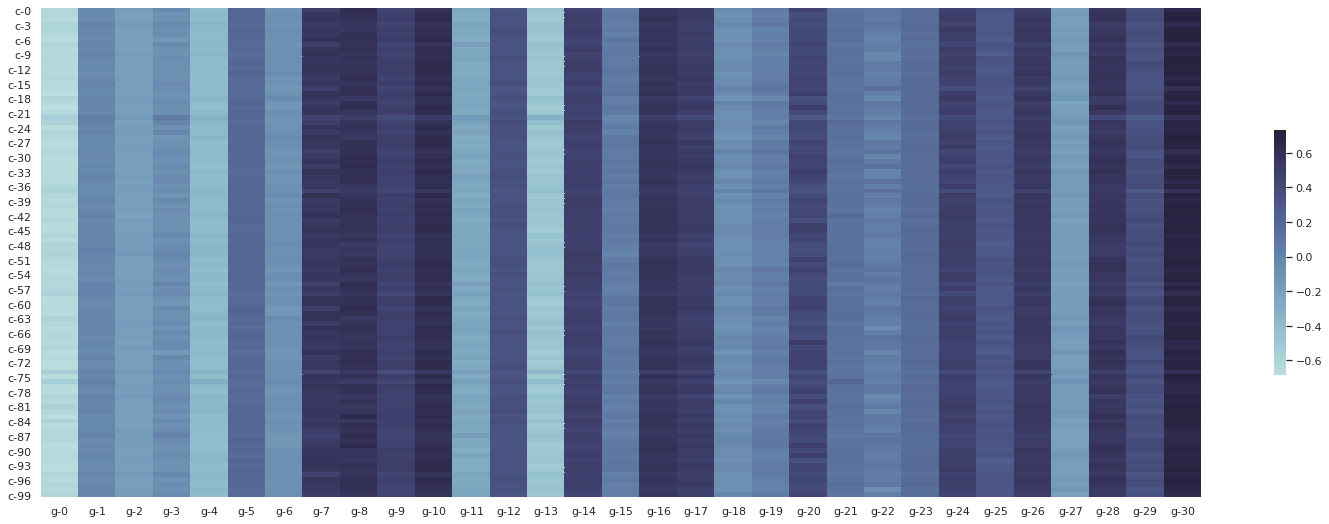

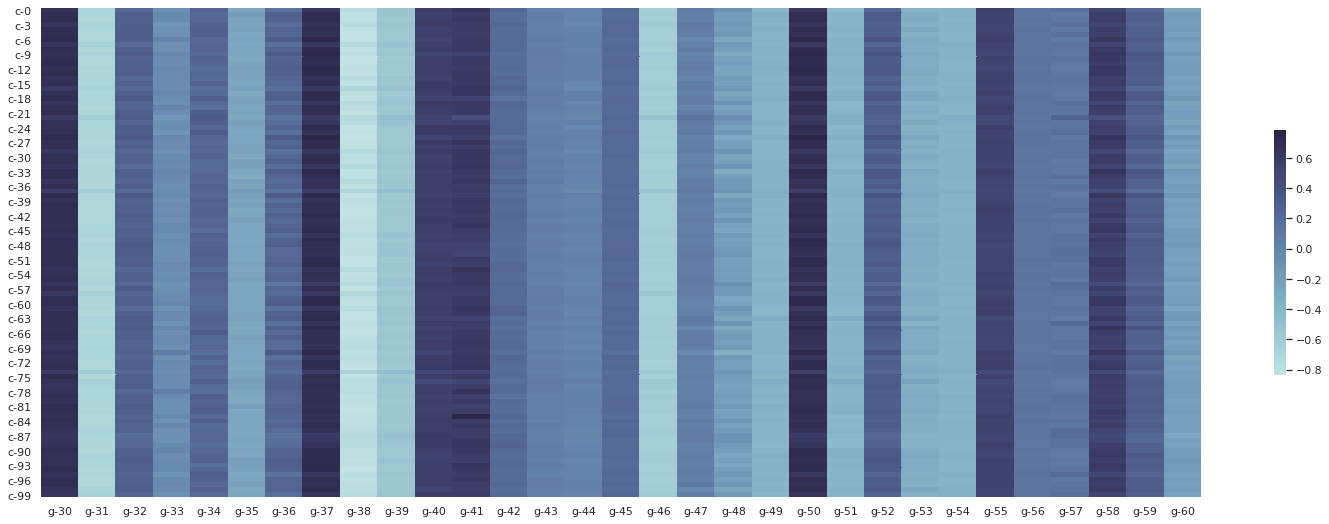

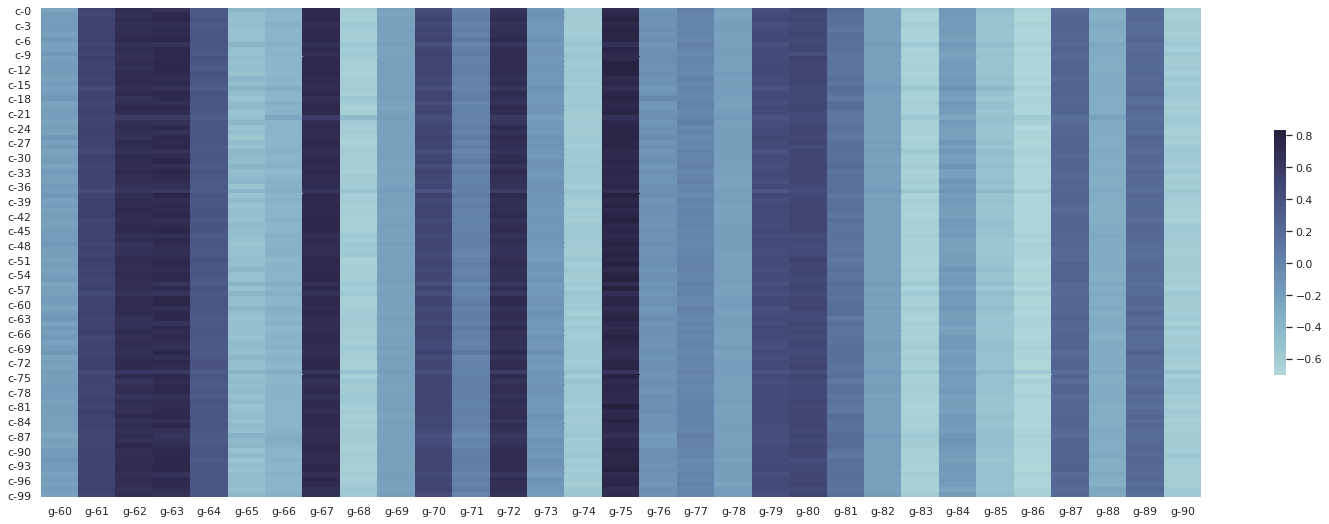

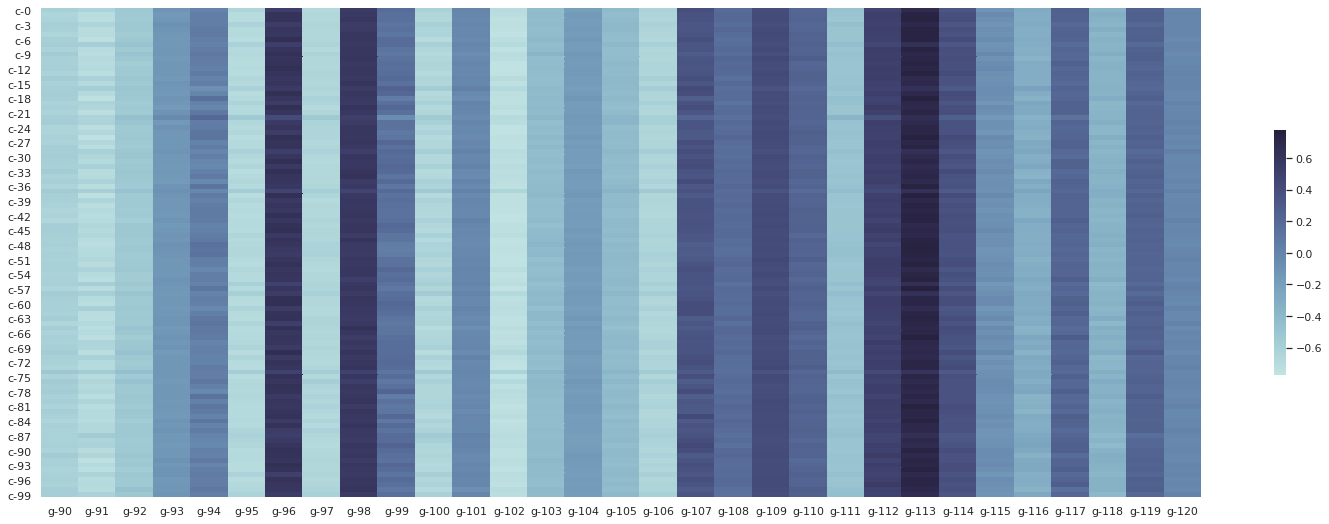

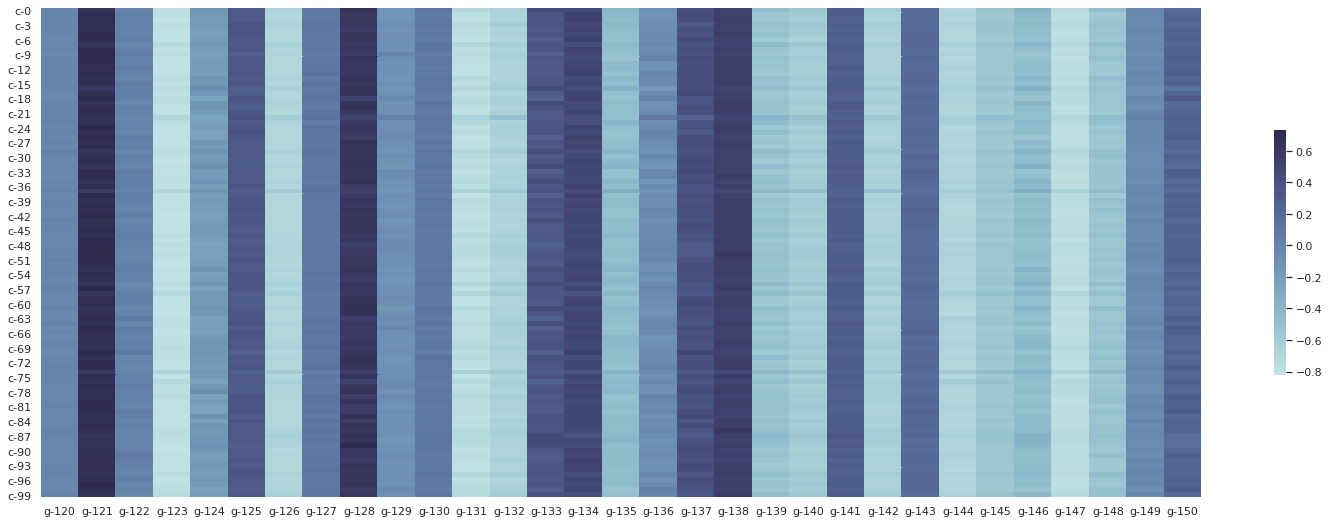

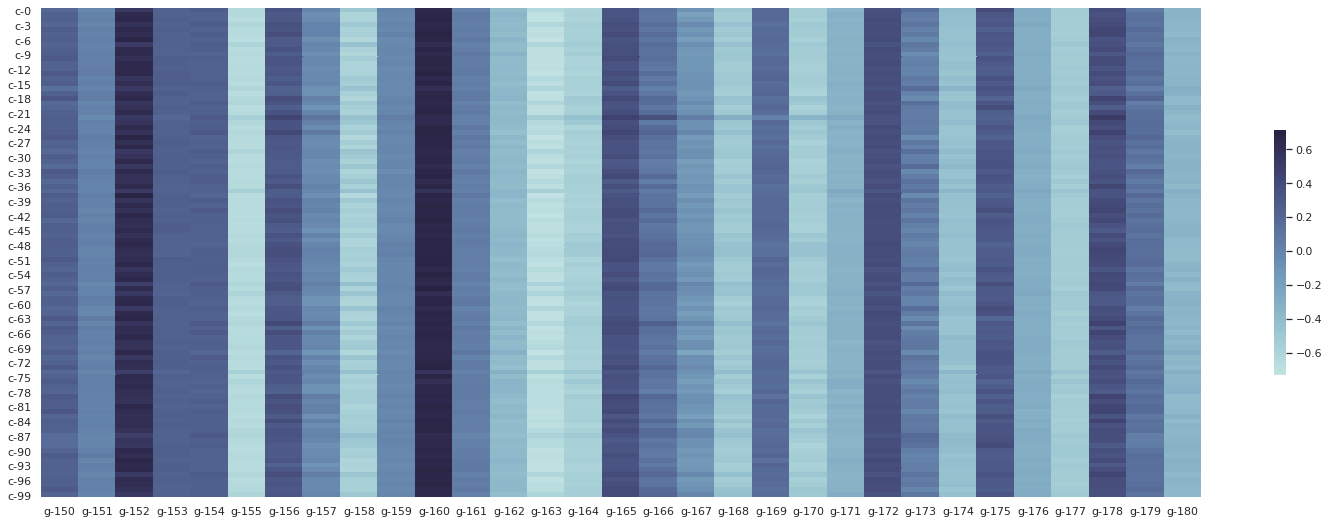

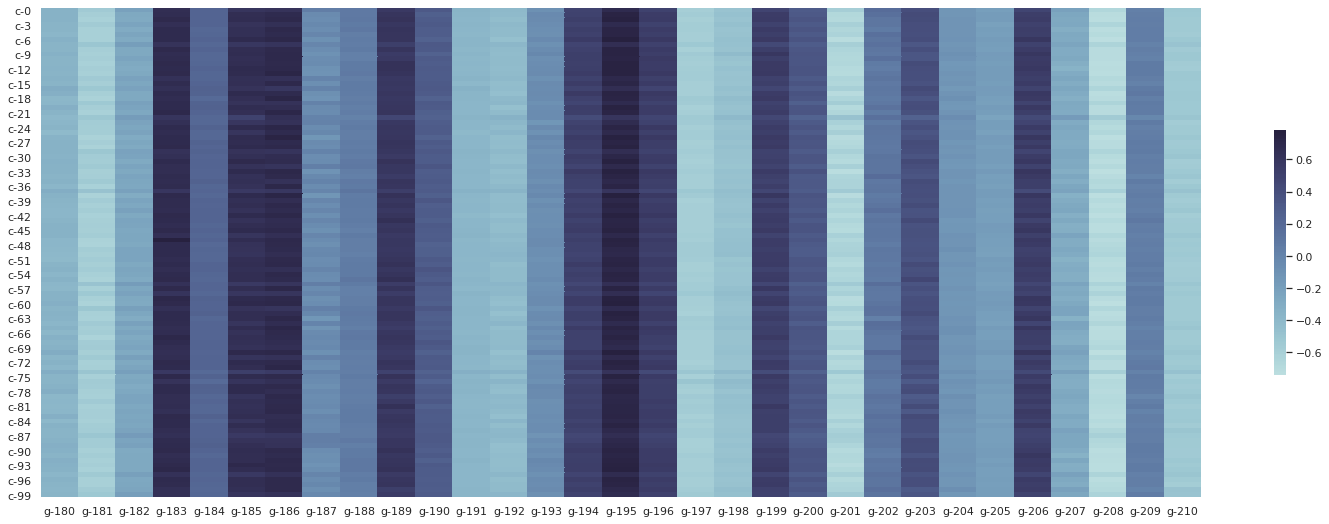

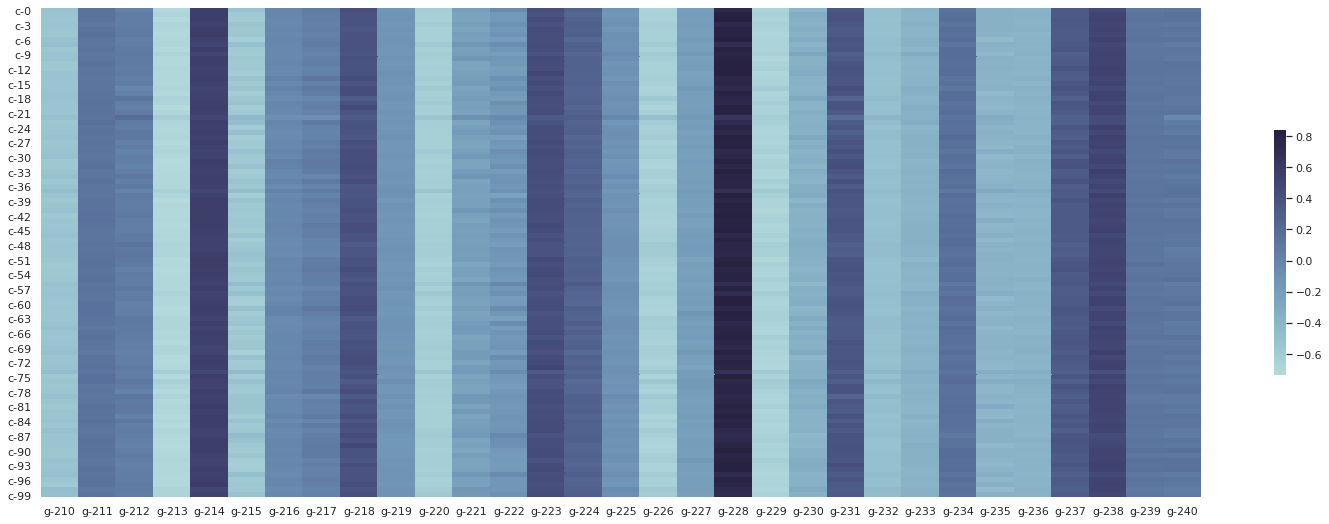

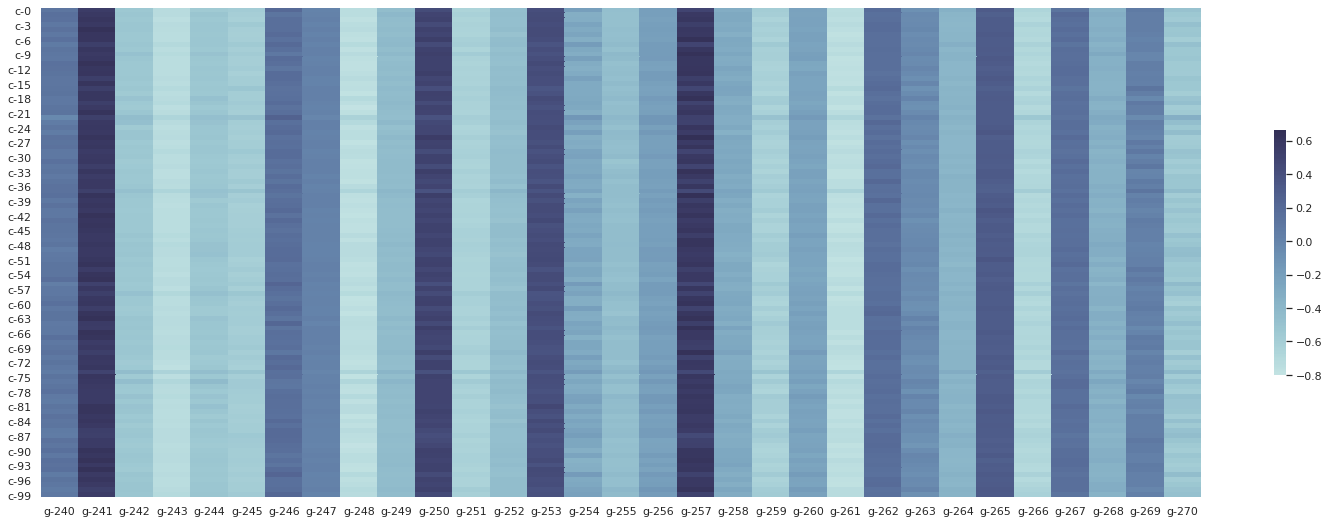

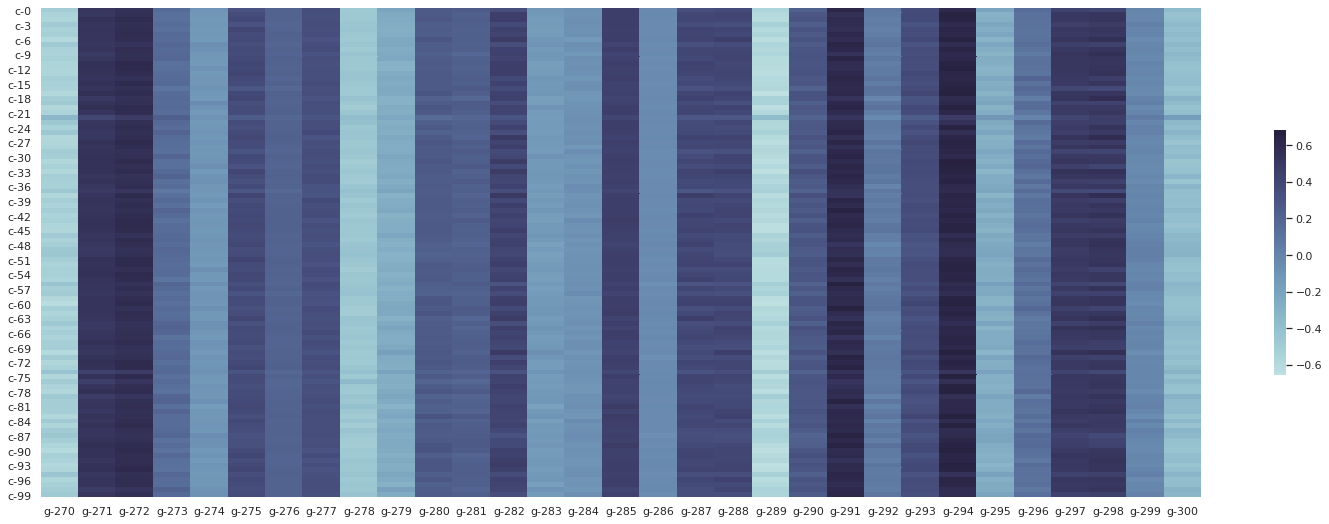

In [ ]:

for a in range(10):
  corr_to_plot = corr.loc[f'c-0':f'c-99',f'g-{0+30*a}':f'g-{30+30*a}']
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(26, 9))

  # Generate a custom diverging colormap
  cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_to_plot, cmap=cmap, center=0,
              square=False, linewidths=0, cbar_kws={"shrink": .5})
  plt.show()

Teste apenas genes que estão no com controle

In [ ]:
#Exemplo em codigo
corr_com_controle = pd.concat([dados.query('tratamento == "com_controle"').loc[:,'g-0':'g-500'],dados.loc[:,'c-0':'c-99']],axis=1).corr()

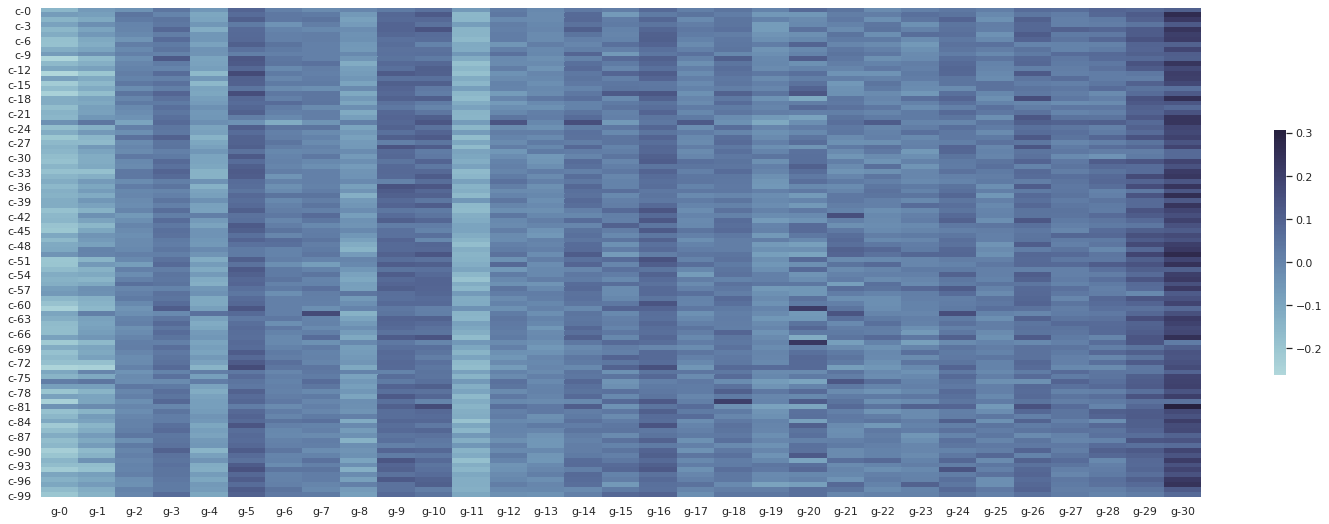

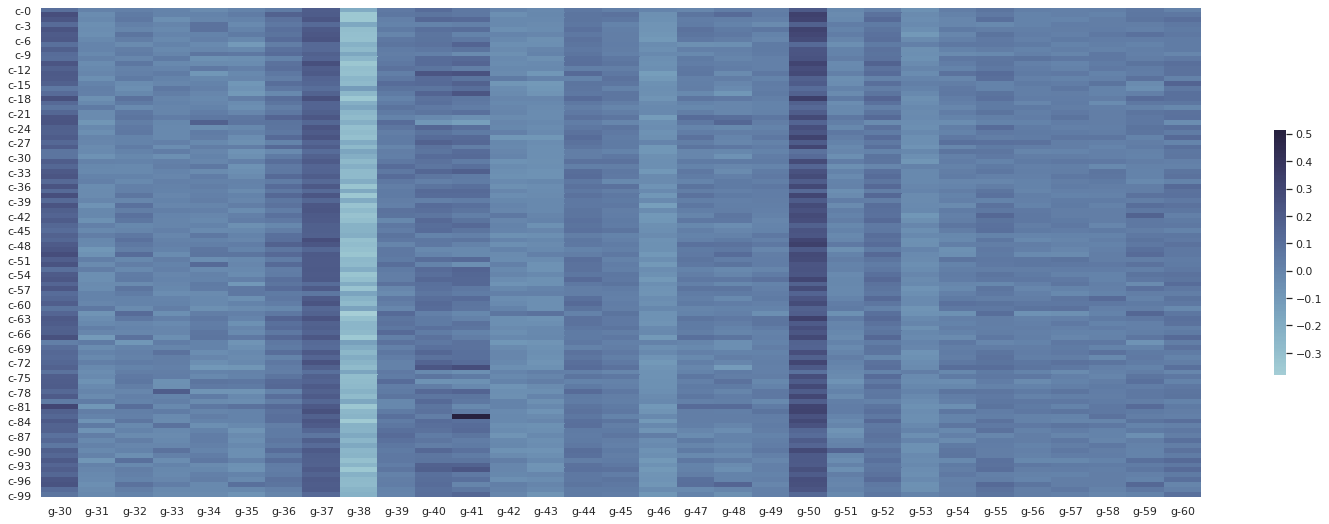

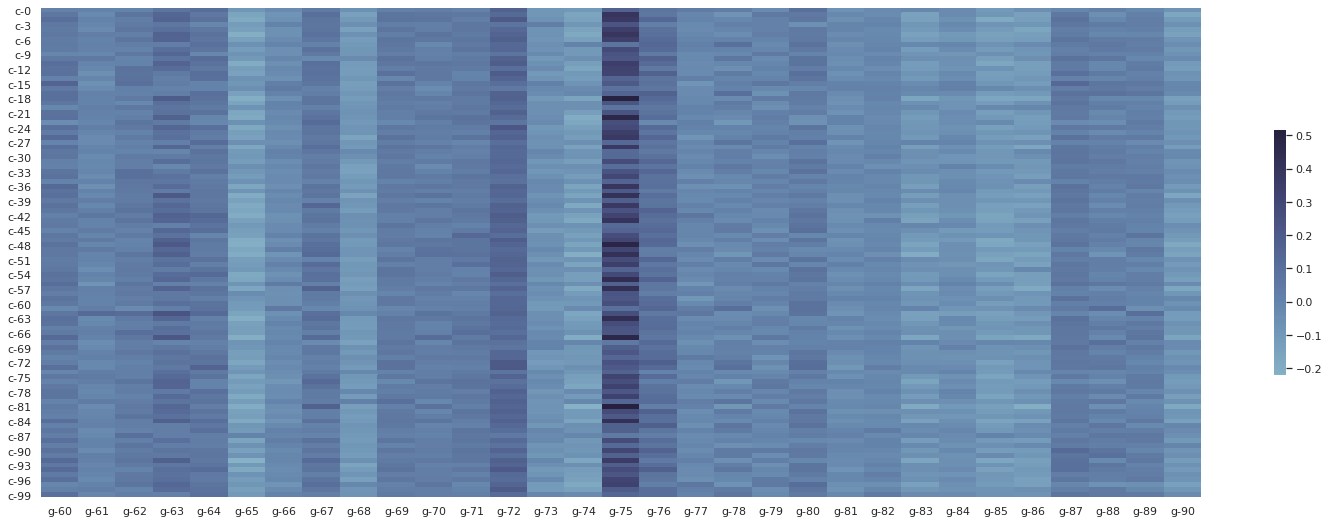

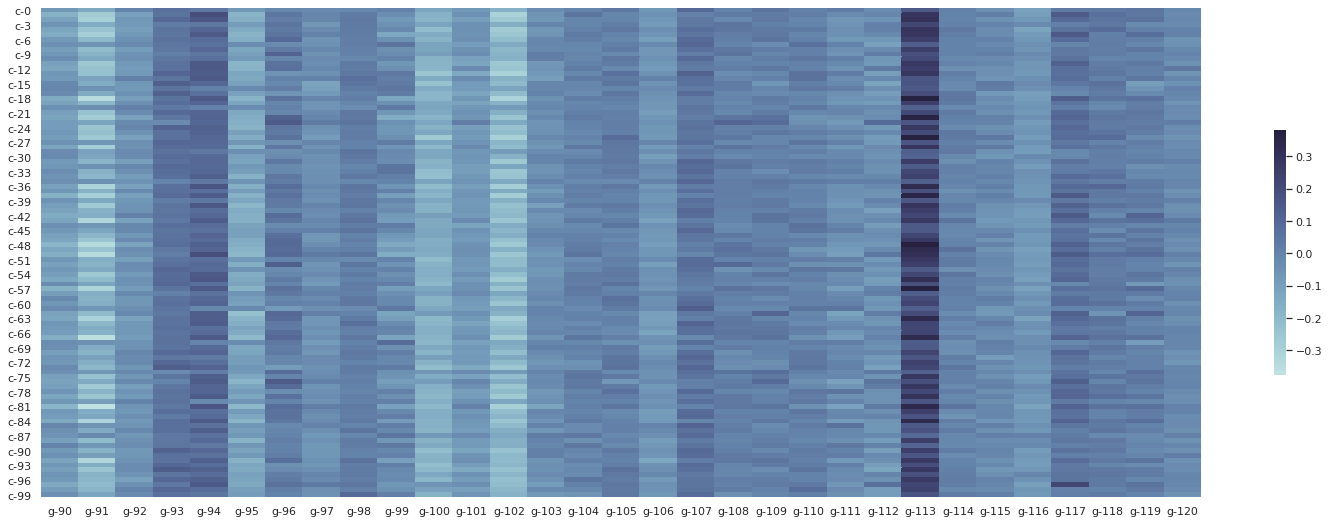

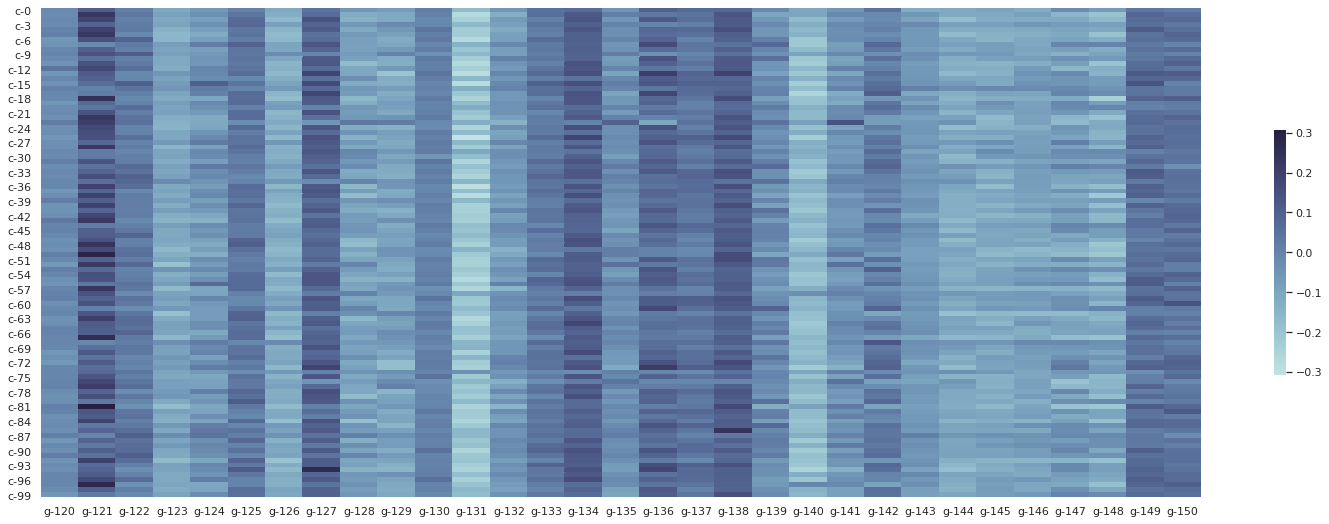

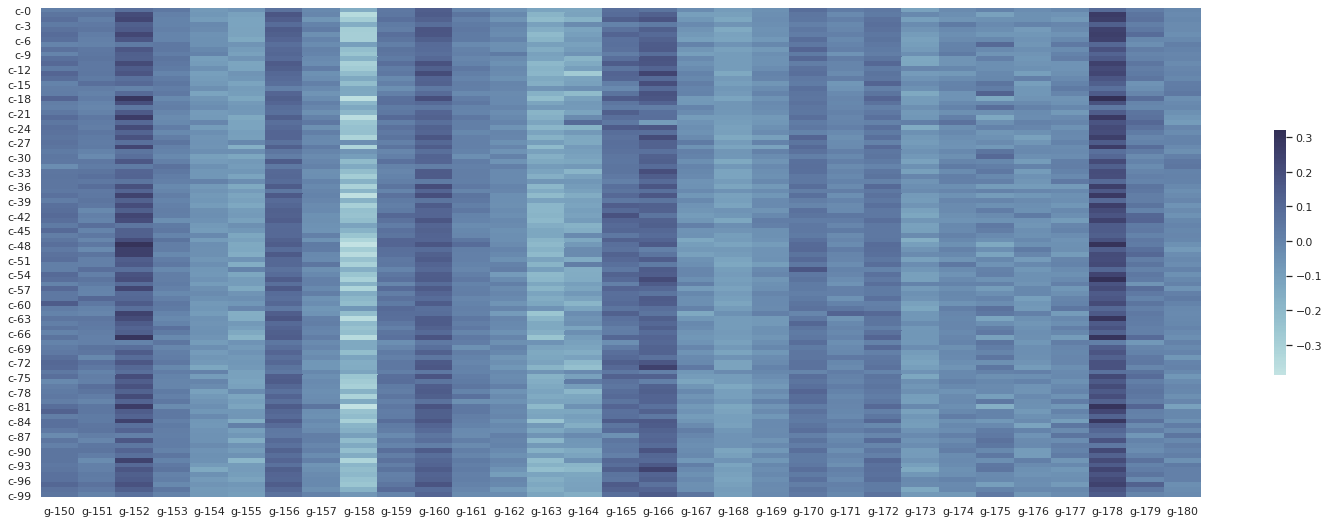

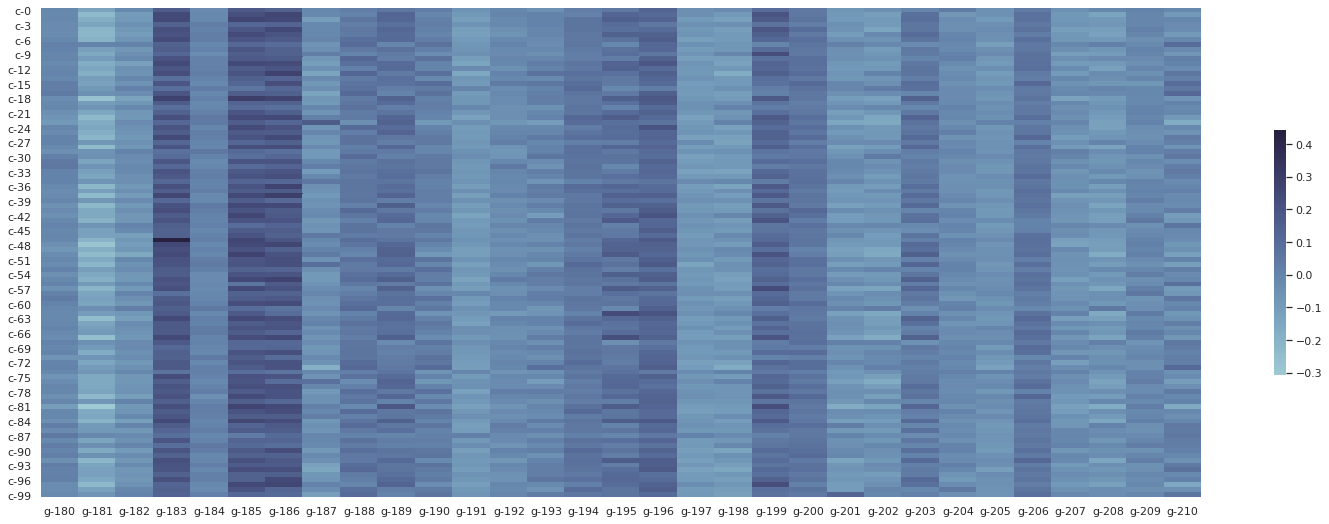

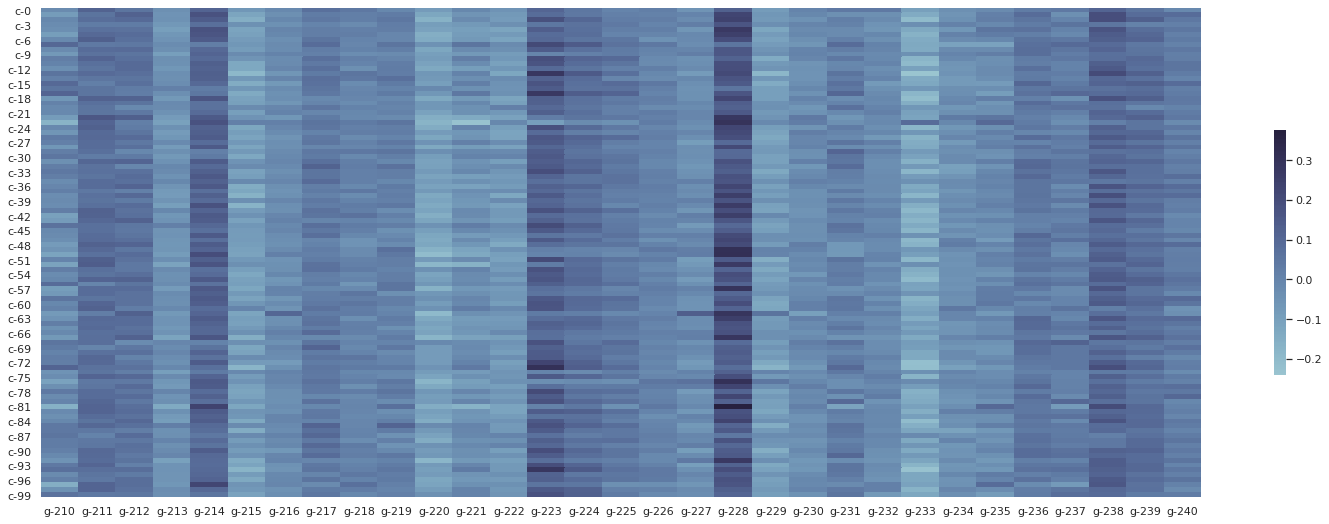

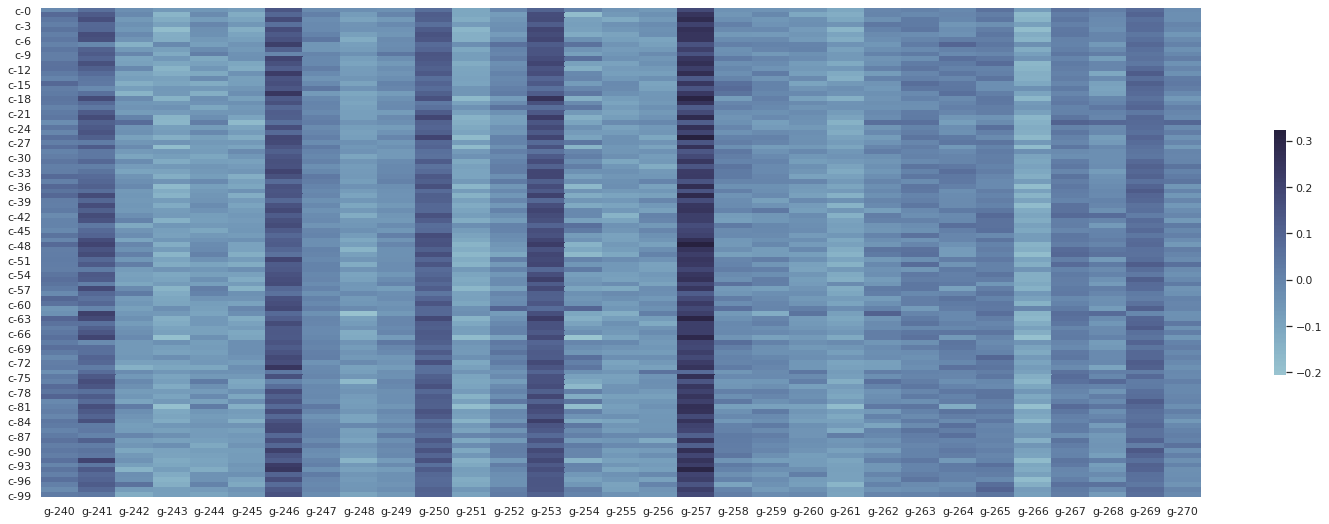

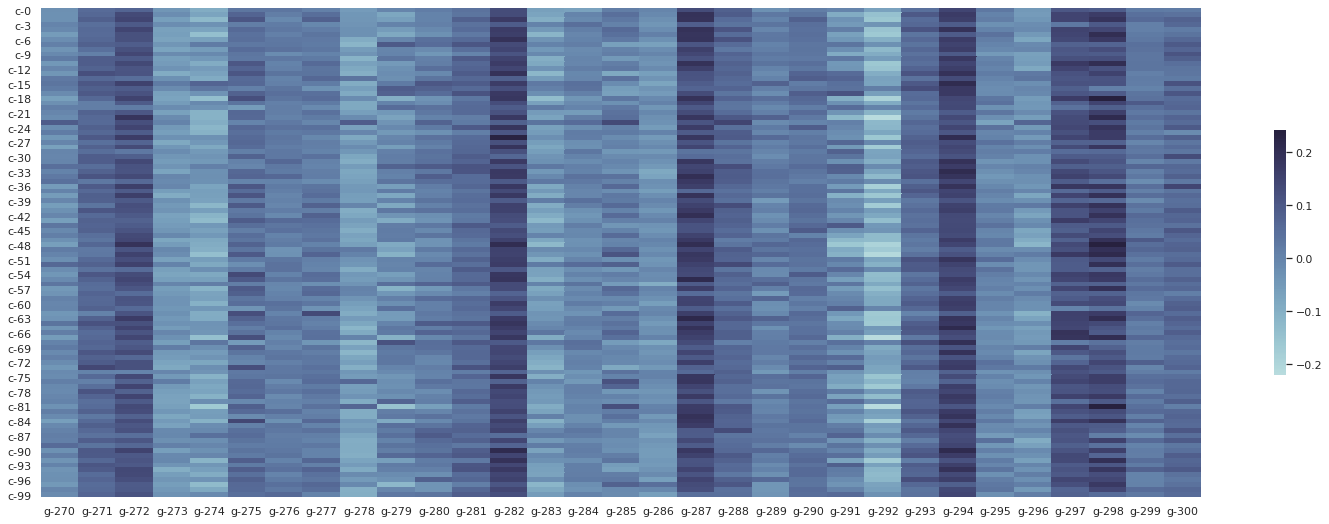

In [ ]:
for a in range(10):
  corr_to_plot = corr_com_controle.loc[f'c-0':f'c-99',f'g-{0+30*a}':f'g-{30+30*a}']
  # Set up the matplotlib figure
  f, ax = plt.subplots(figsize=(26, 9))

  # Generate a custom diverging colormap
  cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

  # Draw the heatmap with the mask and correct aspect ratio
  sns.heatmap(corr_to_plot, cmap=cmap, center=0,
              square=False, linewidths=0, cbar_kws={"shrink": .5})
  plt.show()

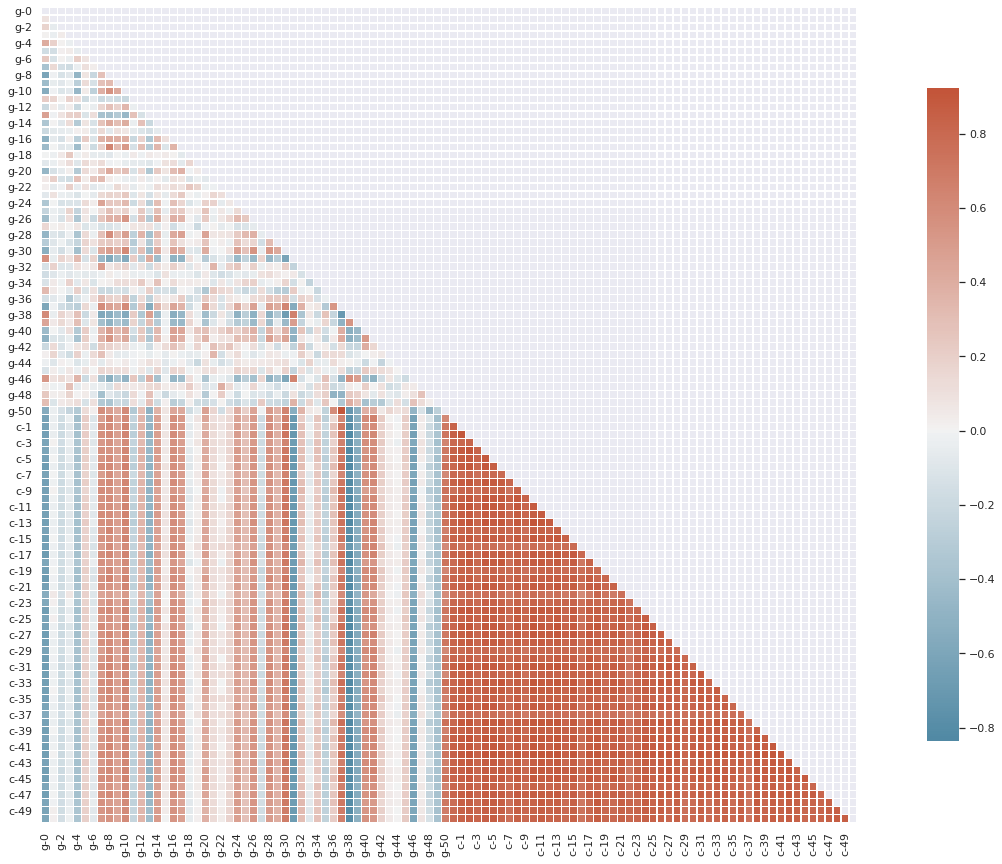

In [38]:
corr_gene = dados.loc[:,'g-0':'g-50']
corr_celular = dados.loc[:,'c-0':'c-50']

geneCelula = pd.concat([corr_gene, corr_celular], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(geneCelula, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(geneCelula, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})

## Desafio 6

**Estudar o código que plota a matriz de correlação (heatmap)**

o HeatMap plota um gráfico de calor, onde as cores indicam o valor que corresponde as colunas x e y. 

O seguinte codigo foi utilizado em aula:

``` python
corr_celular = dados.loc[:,'g-0':'g-50'].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
```

Nesse codigo, fazemos a correlação entre as primeiras 51 entre as variáveis, e posteriormente plotamos o grafico. O diferencial é que, cria-se uma mascara para não repetir informação, visto que quando comparamos correlação, se temos os mesmos valores para coluna e linha, os dados se repetem ao espelho da diagonal principal, e todos os valores da diagonal principal são 1. Exemplo: correlação_entre('c-0' e 'c-1') é igual a correlação_entre('c-1' e 'c-0').

In [ ]:
corr_celular = dados.loc[:,'g-0':'g-50'].corr()

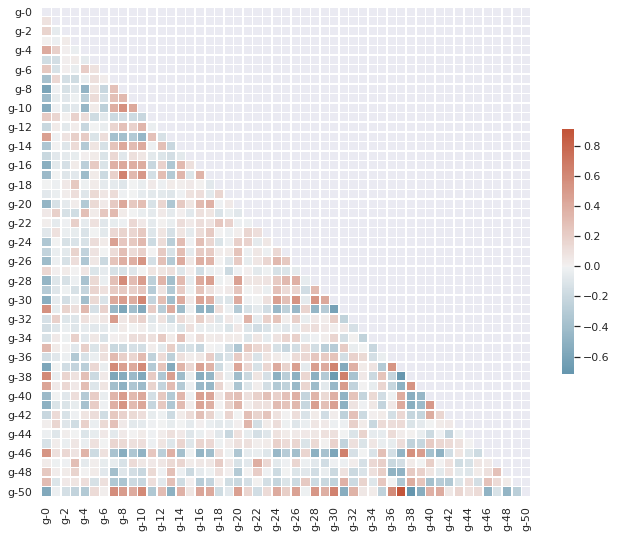

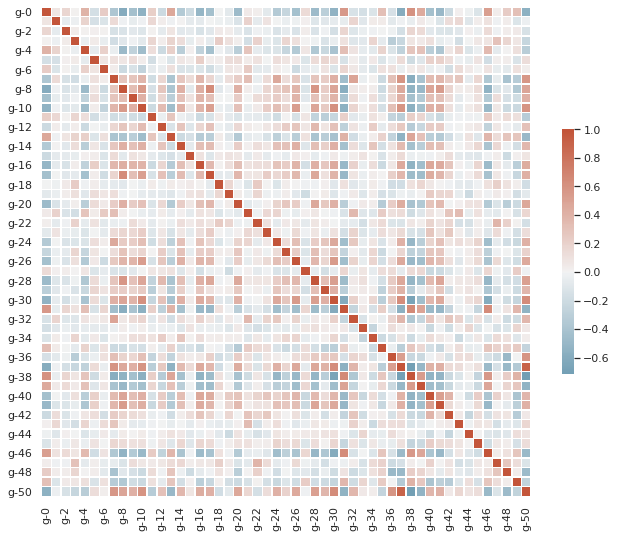

In [ ]:
#Plot com mascara

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#Plot sem mascara
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Desafio 7

**Resumo do que você aprendeu com os dados**

-Criar tabela de frequencia com crosstable, groupby, pivot e melt.
-normalizar por coluna, e por linha
-Aplicação e análise do gráfico de dispersão com a função sns.scatterplot;